In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web

In [4]:
# Define the instruments to download.
tickers = ['ACWI', 'TLT', 'STIP', 'FLOT', 'BND', 'GLD', 'PFF', 'UPRO']

start = datetime.datetime(2012, 5, 21)
end = datetime.datetime(2020, 5, 20)

data = web.DataReader(tickers, 'yahoo', start, end)

In [5]:
data

Attributes  Adj Close                                               \
Symbols          ACWI        BND       FLOT         GLD        PFF   
Date                                                                 
2012-05-21  35.953373  67.902786  44.786110  154.649994  23.864384   
2012-05-22  35.869812  67.789757  44.822186  152.080002  24.097982   
2012-05-23  35.727776  67.838188  44.777103  151.619995  24.123228   
2012-05-24  35.652573  67.765526  44.858284  151.410004  24.217934   
2012-05-25  35.502186  67.846275  44.849262  152.679993  24.268436   
2012-05-29  36.003510  67.846275  44.858284  151.020004  24.394701   
2012-05-30  35.326721  68.104614  44.849262  151.910004  24.249506   
2012-05-31  35.368500  68.233841  44.921402  151.619995  24.186378   
2012-06-01  34.482819  68.473373  44.902447  157.500000  24.028967   
2012-06-04  34.583084  68.303444  44.893417  157.320007  24.073391   
2012-06-05  34.833744  68.165863  44.920498  157.139999  24.168592   
2012-06-06  35.752842  68.036385  44.974655  157.210007  24.282845   
2012-06-07  35.819691  68.060669  45.028839  154.500000  24.270159   
2012-06-08  35.853115  68.101112  45.001755  154.729996  24.308226   
2012-06-11  35.401913  68.157784  45.028839  155.360001  24.213018   
2012-06-12  35.911602  68.052574  45.028839  156.460007  24.301886   
2012-06-13  35.644218  68.198280  45.001755  157.119995  24.327269   
2012-06-14  35.978447  68.157784  44.983704  157.750000  24.390730   
2012-06-15  36.396202  68.311493  45.028839  157.839996  24.416128   
2012-06-18  36.429634  68.319580  45.028839  157.929993  24.473246   
2012-06-19  36.930962  68.230621  45.046898  157.160004  24.530357   
2012-06-20  36.972736  68.101112  45.046898  155.970001  24.581142   
2012-06-21  36.027367  68.214409  45.046898  152.020004  24.498627   
2012-06-22  36.273026  68.076836  45.046898  152.639999  24.555752   
2012-06-25  35.612289  68.254860  45.073971  153.759995  24.581142   
2012-06-26  35.815586  68.182022  45.037861  152.619995  24.625568   
2012-06-27  36.137486  68.254860  45.064945  152.830002  24.676348   
2012-06-28  36.078201  68.327705  45.119095  151.050003  24.752497   
2012-06-29  37.162483  68.279114  45.119095  155.190002  24.771557   
2012-07-02  37.382736  68.422676  45.139885  155.089996  24.864050   
...               ...        ...        ...         ...        ...   
2020-04-08  65.300003  86.357948  49.228264  154.649994  32.559471   
2020-04-09  66.250000  87.306061  49.447857  158.690002  33.803337   
2020-04-13  65.720001  87.026611  49.597572  161.410004  33.445103   
2020-04-14  67.410004  87.026611  49.567631  162.679993  33.664024   
2020-04-15  65.730003  87.455757  49.667442  161.850006  33.335644   
2020-04-16  66.010002  87.505661  49.697392  161.710007  33.285889   
2020-04-17  67.809998  87.385895  49.757275  158.570007  33.693878   
2020-04-20  66.820000  87.246178  49.727333  159.699997  33.534664   
2020-04-21  64.769997  87.355957  49.777241  158.610001  33.017212   
2020-04-22  66.290001  87.286095  49.667442  161.729996  33.305790   
2020-04-23  66.220001  87.425819  49.757275  163.339996  33.534664   
2020-04-24  66.900002  87.395882  49.777241  162.639999  33.843140   
2020-04-27  67.989998  87.086502  49.787224  161.559998  33.932697   
2020-04-28  68.000000  87.345978  49.807186  160.839996  33.942650   
2020-04-29  69.800003  87.405861  49.847111  161.729996  34.480003   
2020-04-30  68.720001  87.335999  49.906998  158.800003  34.480003   
2020-05-01  66.910004  87.300003  49.880001  159.779999  33.959999   
2020-05-04  67.129997  87.389999  49.919998  160.339996  33.990002   
2020-05-05  67.599998  87.309998  49.930000  161.020004  33.990002   
2020-05-06  67.239998  86.919998  49.930000  158.949997  33.860001   
2020-05-07  68.129997  87.199997  49.930000  161.389999  34.049999   
2020-05-08  69.260002  86.949997  49.990002  160.419998  34.259998   
2020-05-11  69.330002  86.680000  50.000000  159.419998  34.250000   
2020-05-12

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2012-05-21 to 2020-05-20
Data columns (total 48 columns):
(Adj Close, ACWI)    2013 non-null float64
(Adj Close, BND)     2013 non-null float64
(Adj Close, FLOT)    2013 non-null float64
(Adj Close, GLD)     2013 non-null float64
(Adj Close, PFF)     2013 non-null float64
(Adj Close, STIP)    2013 non-null float64
(Adj Close, TLT)     2013 non-null float64
(Adj Close, UPRO)    2013 non-null float64
(Close, ACWI)        2013 non-null float64
(Close, BND)         2013 non-null float64
(Close, FLOT)        2013 non-null float64
(Close, GLD)         2013 non-null float64
(Close, PFF)         2013 non-null float64
(Close, STIP)        2013 non-null float64
(Close, TLT)         2013 non-null float64
(Close, UPRO)        2013 non-null float64
(High, ACWI)         2013 non-null float64
(High, BND)          2013 non-null float64
(High, FLOT)         2013 non-null float64
(High, GLD)          2013 non-null float64
(High, PFF)    

In [7]:
table = data.drop(columns = ['Close', 'High', 'Low', 'Open', 'Volume'])

C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'price in $')

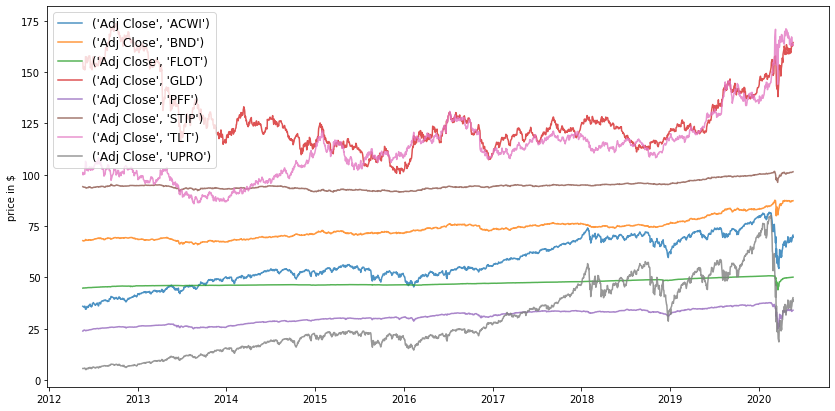

In [8]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=1.5, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

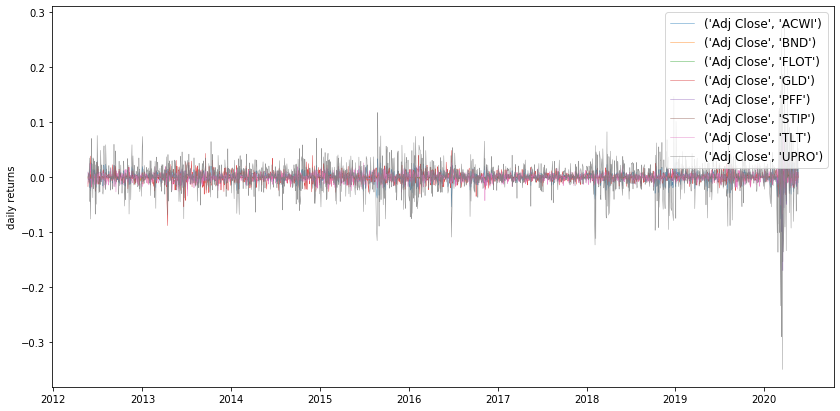

In [9]:
returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=0.5, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [10]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(8)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [11]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
#the risk-free rate has been taken from U.S. Department of The Treasury. The rate of 0.16% is the 52week treasury bill rates at 2020/05/19. 
risk_free_rate = 0.0016 

In [12]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.09
Annualised Volatility: 0.08


Attributes Adj Close                                             
Symbols         ACWI    BND  FLOT  GLD   PFF   STIP    TLT   UPRO
allocation      2.72  16.45  3.32  2.7  1.21  21.02  38.69  13.88
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.02
Annualised Volatility: 0.03


Attributes Adj Close                                             
Symbols         ACWI   BND   FLOT   GLD   PFF   STIP    TLT  UPRO
allocation      1.12  9.74  25.86  2.05  0.27  47.43  13.31  0.22


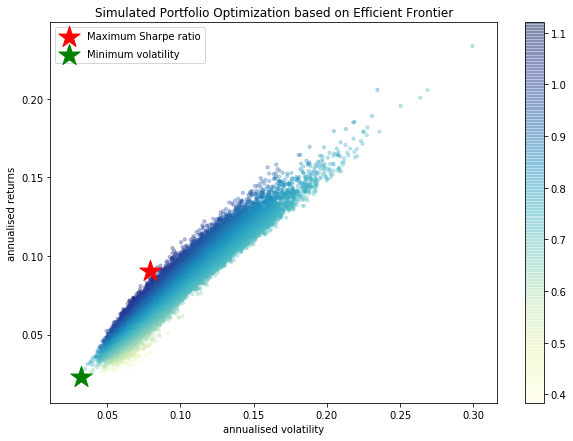

In [13]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [14]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

In [15]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [16]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [17]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [18]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.13
Annualised Volatility: 0.11


Attributes Adj Close                                         
Symbols         ACWI    BND FLOT  GLD  PFF STIP    TLT   UPRO
allocation       0.0  19.02  0.0  0.0  0.0  0.0  60.21  20.77
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.01
Annualised Volatility: 0.02


Attributes Adj Close                                      
Symbols         ACWI  BND  FLOT  GLD  PFF   STIP  TLT UPRO
allocation       0.0  0.0  7.44  0.0  0.0  92.56  0.0  0.0


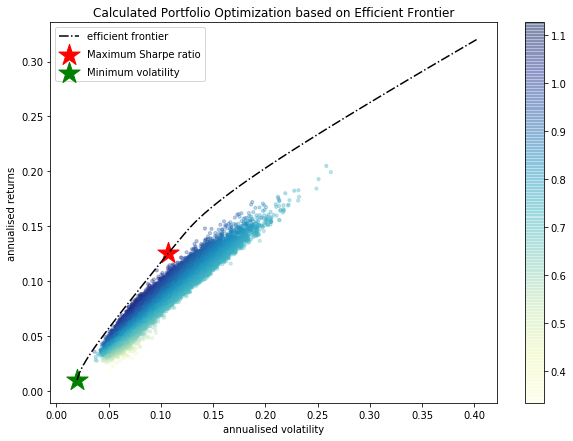

In [19]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [20]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.13
Annualised Volatility: 0.11


Attributes Adj Close                                         
Symbols         ACWI    BND FLOT  GLD  PFF STIP    TLT   UPRO
allocation       0.0  19.02  0.0  0.0  0.0  0.0  60.21  20.77
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.01
Annualised Volatility: 0.02


Attributes Adj Close                                      
Symbols         ACWI  BND  FLOT  GLD  PFF   STIP  TLT UPRO
allocation       0.0  0.0  7.44  0.0  0.0  92.56  0.0  0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

('Adj Close', 'ACWI') : annuaised return 0.1 , annualised volatility: 0.16
('Adj Close', 'BND') : annuaised return 0.03 , annualised volatility: 0.04
('Adj Close

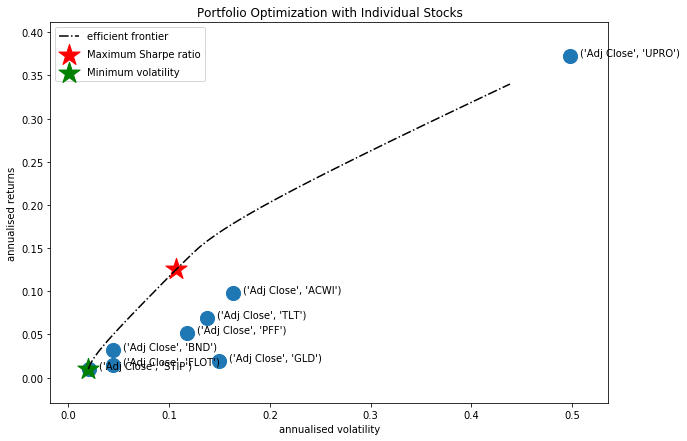

In [21]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)